# Samplers (and pseudolabeling) benchmark 
In this notebook we will test sampling strategies (and PL) implemented in Active_learning_samplings.ipynb \
We will evaluate them based on accuracy, f1, precision and recall with 4 starting fractions of train: 0.001, 0.005, 0.05, 0.1 using logistic regression. \
They will be compared against random sampling strategy.

In [3]:
import modules
import importlib
import numpy as np
import torch
import logging
import random
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from modules.models import Linear
from modules import ActiveLearning
from modules import Suggester
from collections import defaultdict 


importlib.reload(modules)
importlib.reload(modules.models.Linear)
importlib.reload(modules.ActiveLearning)

random_seed = 42
sns.set_style("darkgrid")

In [2]:
def import_dataset():
    le = preprocessing.LabelEncoder()
    vectorized_output_path = "selfpost/vectorized.npy"
    vectorized_labels_output_path = "selfpost/vectorized_labels.npy"
    with open(vectorized_output_path, "rb") as vect_X, open(vectorized_labels_output_path, "rb") as vect_y:
        X = np.load(vect_X, allow_pickle=True)
        y = np.load(vect_y, allow_pickle=True)
    le.fit(y)
    y = le.transform(y)
    return X, y, le.get_params() 

In [3]:
X, y, y_dict = import_dataset()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=random_seed)

In [4]:
from collections import defaultdict 


def test_sampling(sampling, train_fraction, samples_to_label, epochs=5):
    torch.manual_seed(random_seed)
    torch.cuda.manual_seed(random_seed)
    torch.cuda.manual_seed_all(random_seed)
    np.random.seed(random_seed)
    torch.use_deterministic_algorithms(False)
    random.seed(random_seed)

    logging.getLogger().setLevel(logging.INFO)
    sug = Suggester.Suggester(X,y, test_size=1-train_fraction)
    suggest_alg = sampling(samples_to_label)
    model = Linear.LinearModelTorch(Linear.LogReg(), 100)
    model.train(sug.X_train, sug.y_train)
    metric_dict = defaultdict(list)
    metrics = sug.evaluate_metrics(model)
    for key, val in metrics.items():
        metric_dict[key].append(val)
    for ep in range(epochs):
        sug.active_learning_suggest(suggest_alg, model, sample_ratio=1)
        sug.apply_last_suggest()
        model = Linear.LinearModelTorch(Linear.LogReg(), 100)
        model.train(sug.X_train, sug.y_train)
        metrics = sug.evaluate_metrics(model)
        for key, val in metrics.items():
            metric_dict[key].append(val)
    return metric_dict

In [ ]:
dct = test_sampling(ActiveLearning.ConfidenceSamplingSuggestion, 0.001)

In [ ]:
all_metrics = defaultdict(defaultdict)
train_fraction = 0.001
all_metrics["RandomSampling"] = test_sampling(ActiveLearning.RandomSampling, train_fraction, 20000, 7)
all_metrics["ConfidenceSampling"] = test_sampling(ActiveLearning.ConfidenceSamplingSuggestion, train_fraction, 20000, 7)
all_metrics["MarginSampling"] = test_sampling(ActiveLearning.MarginSampling, train_fraction, 20000, 7)
all_metrics["EntropySampling"] = test_sampling(ActiveLearning.EntropySampling, train_fraction, 20000, 7)
all_metrics["PseudoLabeling"] = test_sampling(ActiveLearning.PseudoLabeling, train_fraction, 20000, 7)


In [14]:
import pickle
with open("metricdict.pkl", "wb") as file:
    pickle.dump(all_metrics, file)

In [ ]:
all_metrics005 = defaultdict(defaultdict)
train_fraction = 0.005
all_metrics005["RandomSampling"] = test_sampling(ActiveLearning.RandomSampling, train_fraction, 20000, 7)
all_metrics005["ConfidenceSampling"] = test_sampling(ActiveLearning.ConfidenceSampling, train_fraction, 20000, 7)
all_metrics005["MarginSampling"] = test_sampling(ActiveLearning.MarginSampling, train_fraction, 20000, 7)
all_metrics005["EntropySampling"] = test_sampling(ActiveLearning.EntropySampling, train_fraction, 20000, 7)
all_metrics005["PseudoLabeling"] = test_sampling(ActiveLearning.PseudoLabeling, train_fraction, 20000, 7)

In [7]:
import pickle
with open("metricdict005.pkl", "wb") as file:
    pickle.dump(all_metrics005, file)

In [ ]:
all_metrics05 = defaultdict(defaultdict)
train_fraction = 0.05
all_metrics05["RandomSampling"] = test_sampling(ActiveLearning.RandomSampling, train_fraction, 20000, 7)
all_metrics05["ConfidenceSampling"] = test_sampling(ActiveLearning.ConfidenceSampling, train_fraction, 20000, 7)
all_metrics05["MarginSampling"] = test_sampling(ActiveLearning.MarginSampling, train_fraction, 20000, 7)
all_metrics05["EntropySampling"] = test_sampling(ActiveLearning.EntropySampling, train_fraction, 20000, 7)
all_metrics05["PseudoLabeling"] = test_sampling(ActiveLearning.PseudoLabeling, train_fraction, 20000, 7)

In [9]:
import pickle
with open("metricdict05.pkl", "wb") as file:
    pickle.dump(all_metrics05, file)

In [ ]:
all_metrics1 = defaultdict(defaultdict)
train_fraction = 0.1
all_metrics1["RandomSampling"] = test_sampling(ActiveLearning.RandomSampling, train_fraction, 20000, 7)
all_metrics1["ConfidenceSampling"] = test_sampling(ActiveLearning.ConfidenceSampling, train_fraction, 20000, 7)
all_metrics1["MarginSampling"] = test_sampling(ActiveLearning.MarginSampling, train_fraction, 20000, 7)
all_metrics1["EntropySampling"] = test_sampling(ActiveLearning.EntropySampling, train_fraction, 20000, 7)
all_metrics1["PseudoLabeling"] = test_sampling(ActiveLearning.PseudoLabeling, train_fraction, 20000, 7)

In [11]:
import pickle
with open("metricdict1.pkl", "wb") as file:
    pickle.dump(all_metrics1, file)

In [ ]:
all_metrics1

In [1]:
import pickle
all_metrics = {}
with open("metricdict.pkl", "rb") as file: 
    all_metrics["0.001"] = pickle.load(file)
with open("metricdict005.pkl", "rb") as file: 
    all_metrics["0.005"] = pickle.load(file)
with open("metricdict05.pkl", "rb") as file: 
    all_metrics["0.05"] = pickle.load(file)
with open("metricdict1.pkl", "rb") as file: 
    all_metrics["0.1"] = pickle.load(file)

In [ ]:
metrics_df = {}
for key, val in all_metrics.items():
    metric_dict = defaultdict(dict)
    for metric_name in next(iter(val.values())).keys():
        for method_name, method_metrics in val.items():
            metric_dict[metric_name][method_name] = method_metrics[metric_name]
        metric_dict[metric_name] = pd.DataFrame(metric_dict[metric_name])
    metrics_df[key] = metric_dict
metrics_df

In [5]:
with open("metricdictall_ready.pkl", "wb") as file:
    pickle.dump(metrics_df, file)

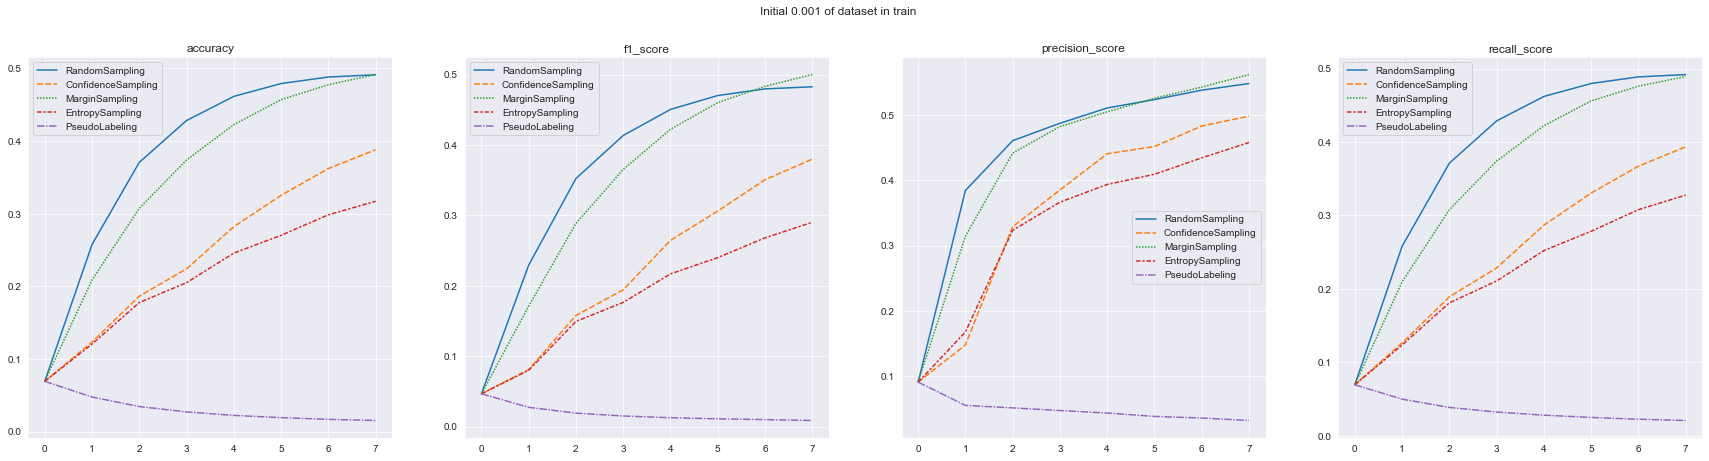

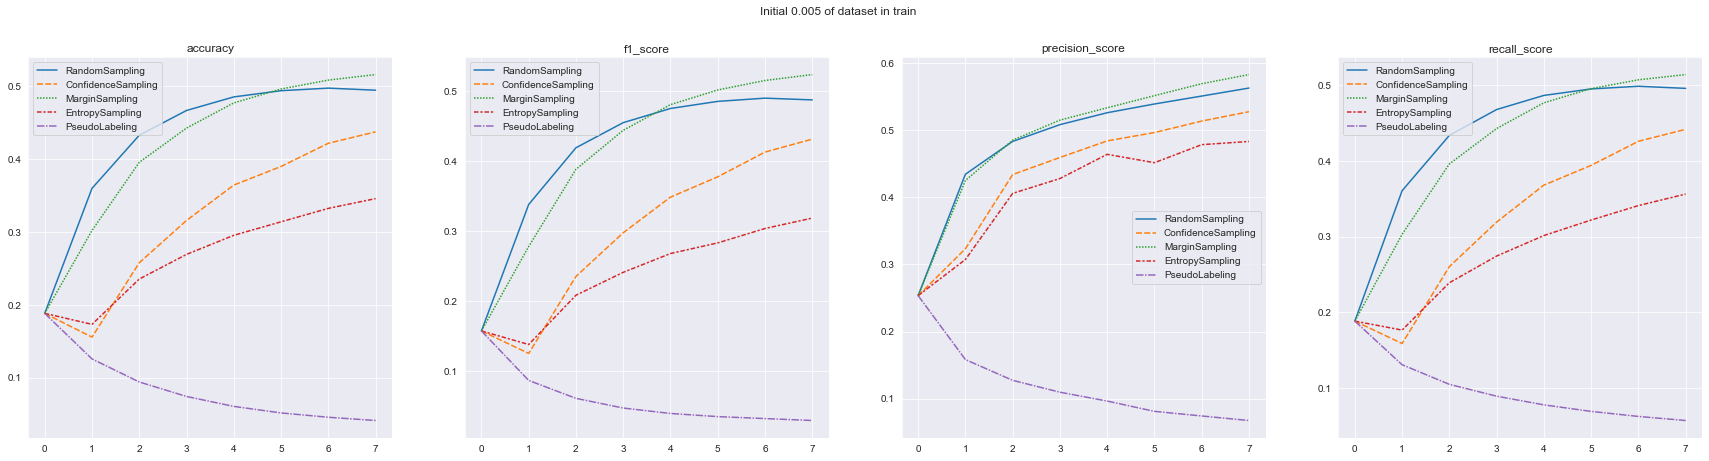

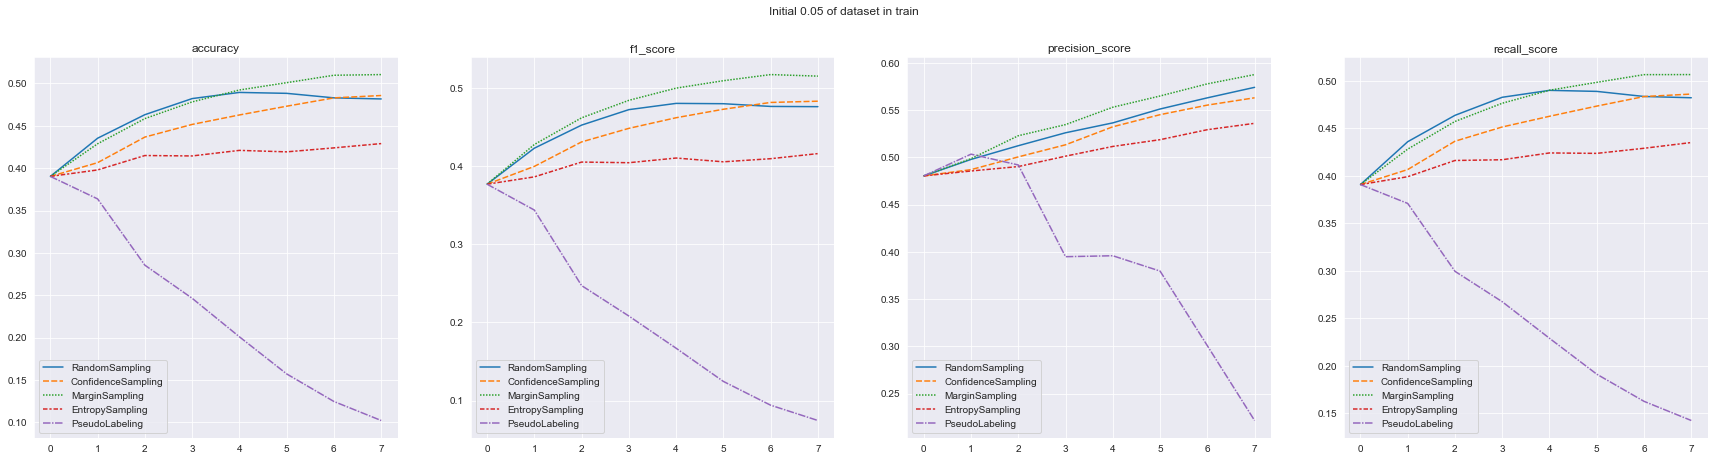

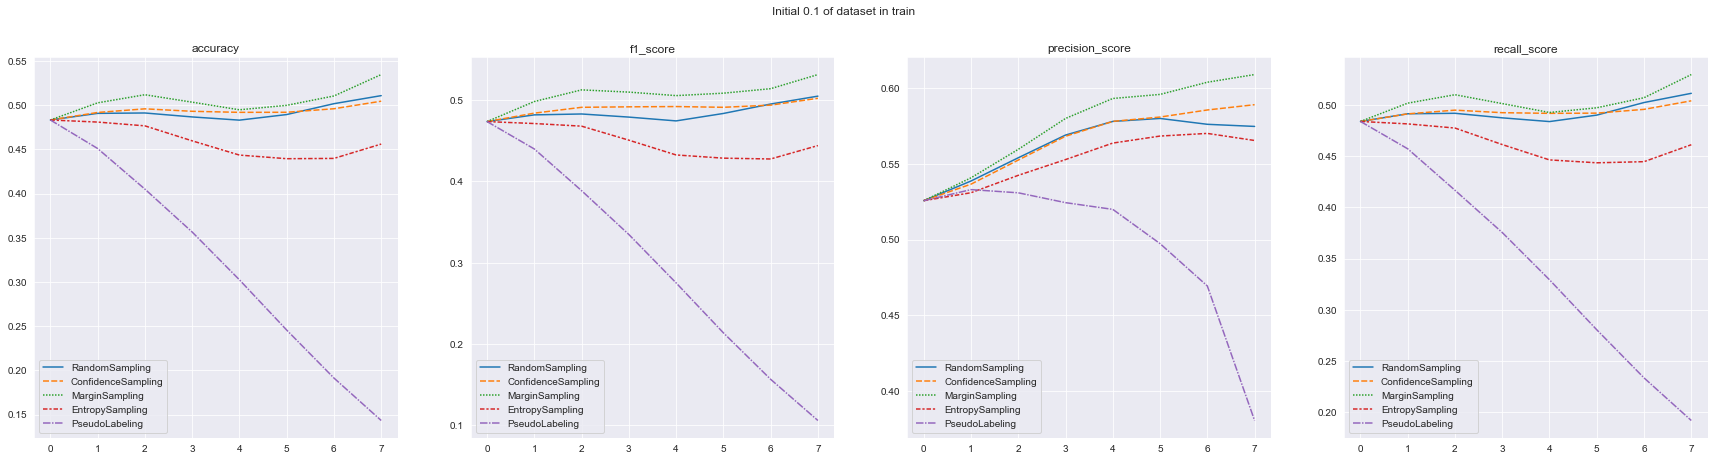

In [71]:

for train_fraction, metrics in metrics_df.items():
    fig, axs = plt.subplots(ncols=4, figsize=(30,7))
    fig.suptitle(f"Initial {train_fraction} of dataset in train")
    for i, (metric, values) in enumerate(metrics.items()):
        sns.lineplot(data=values, ax=axs[i])
        axs[i].set_title(metric)

In [ ]:
# What we found out so far? 
# Low predictive abilities of baseline model (logreg) allow it to only work properly only provided substantial 
#     amount of annotated data at the beggining. We can see that as dataset knowledge of out model grows, 
#     non-random sampling begins to perform better then our baseline
# LogReg is not nearly accurate enough for pseudolabeling to work fine 
# In this case EntropySampling is most weak method, perhaps when we upgrade our model it will perform better (as it takes the most amount of parameters into consideration)